Remove redundancy by clustering the CytB sequences with `vsearch`.

In [4]:
!vsearch -threads 5 --cluster_fast ../1-initial/CytB_cropped.fa --strand both --uc CytB_id-1.uc --id 1 --query_cov 1

vsearch v1.1.0_linux_x86_64, 31.4GB RAM, 12 cores
https://github.com/torognes/vsearch

Reading file ../1-initial/CytB_cropped.fa 100%
3436585 nt in 3745 seqs, min 501, max 1224, avg 918
Indexing sequences 100%
Masking 100%
Sorting by length 100%
Counting unique k-mers 100%
Clustering 100%
Writing clusters 100%
Clusters: 1762 Size min 1, max 197, avg 2.1
Singletons: 1344, 35.9% of seqs, 76.3% of clusters


In [5]:
pj = Project('../1-initial/target_locus.csv', pickle='nr.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


In [6]:
#pj = unpickle_pj('nr.pkl', git=False)

In [7]:
pj.read_embl_genbank(['../1-initial/CytB_cropped.gb'])

/home/reprophylo/reprophylo.py:1015: UserWarning: Version control off
  warnings.warn('Version control off')


In [8]:
pj.extract_by_locus()

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


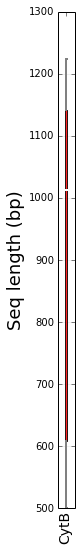

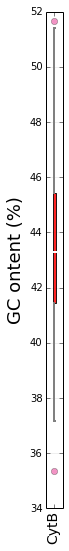

In [9]:
%matplotlib inline
pj.report_seq_stats()


In [10]:
species=[]
for r in pj.records:
    source = [f for f in r.features if f.type == 'source'][0]
    species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print species

Total number of records: 3745
Number of species (see below for full list): 67
['Rutilus rutilus', 'Proterorhinus semilunaris', 'Salmo salar', 'Gymnocephalus cernua', 'Leuciscus leuciscus', 'Lota lota', 'Phoxinus phoxinus', 'Thymallus thymallus', 'Lampetra fluviatilis', 'Barbus barbus', 'Hypophthalmichthys nobilis', 'Esox lucius', 'Alosa alosa', 'Oncorhynchus gorbuscha', 'Barbatula barbatula', 'Oncorhynchus mykiss', 'Sander lucioperca', 'Coregonus autumnalis', 'Petromyzon marinus', 'Squalius cephalus', 'Ponticola kessleri', 'Leuciscus idus', 'Leucaspius delineatus', 'Coregonus lavaretus', 'Misgurnus fossilis', 'Ctenopharyngodon idella', 'Lepomis gibbosus', 'Cyprinus carpio', 'Salvelinus fontinalis', 'Tinca tinca', 'Chondrostoma nasus', 'Perca fluviatilis', 'Coregonus oxyrinchus', 'Gasterosteus aculeatus', 'Vimba vimba', 'Alburnus alburnus', 'Cottus gobio', 'Platichthys flesus', 'Micropterus salmoides', 'Ameiurus melas', 'Carassius auratus', 'Acipenser sturio', 'Alburnoides bipunctatus',

Extract ids of representative sequences identified by vsearch -> remove all others from the object.

In [11]:
ids = []

uc=open('CytB_id-1.uc', 'r')

for line in uc:
    if line.startswith('C'):
        ids.append(line.split("\t")[8])
        
recs_to_keep = {'CytB': ids}
recs_to_drop = {'CytB': []}

for r in pj.records:
    if not r.id in recs_to_keep['CytB']:
        recs_to_drop['CytB'].append(r.id)
        
print "to drop: %s" %len(recs_to_drop['CytB'])
print "to keep: %s" %len(recs_to_keep['CytB'])

print "TOTAL: %s" %(len(recs_to_drop['CytB']) + len(recs_to_keep['CytB']))


to drop: 1983
to keep: 1762
TOTAL: 3745


Adjust lists -> add record to exlusion list and remove record from inclusion list.

 - `JN995186` is a pseudogene and can not be translated.
 - `KP794942` is actually COI. misslabelled.

In [12]:
recs_to_drop['CytB'].append('JN995186.1')
recs_to_drop['CytB'].append('KP794942.1')
print len(recs_to_drop['CytB'])

1985


In [13]:
for r in range(len(recs_to_keep['CytB'])):
    if 'JN995186' in recs_to_keep['CytB'][r]:
        del(recs_to_keep['CytB'][r])
        break
        
for r in range(len(recs_to_keep['CytB'])):
    if 'KP794942' in recs_to_keep['CytB'][r]:
        del(recs_to_keep['CytB'][r])
        break
        
print len(recs_to_keep['CytB'])

1760


Exclude redundant records from object.

In [14]:
pj.exclude(start_from_max=False, **recs_to_drop)

In [15]:
species=[]
for r in pj.records:
    if r.id in recs_to_keep['CytB']:
        source = [f for f in r.features if f.type == 'source'][0]
        species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print species

Total number of records: 1760
Number of species (see below for full list): 67
['Rutilus rutilus', 'Proterorhinus semilunaris', 'Salmo salar', 'Gymnocephalus cernua', 'Leuciscus leuciscus', 'Lota lota', 'Phoxinus phoxinus', 'Thymallus thymallus', 'Lampetra fluviatilis', 'Barbus barbus', 'Hypophthalmichthys nobilis', 'Esox lucius', 'Alosa alosa', 'Oncorhynchus gorbuscha', 'Barbatula barbatula', 'Oncorhynchus mykiss', 'Sander lucioperca', 'Coregonus autumnalis', 'Petromyzon marinus', 'Squalius cephalus', 'Ponticola kessleri', 'Leuciscus idus', 'Leucaspius delineatus', 'Coregonus lavaretus', 'Misgurnus fossilis', 'Ctenopharyngodon idella', 'Lepomis gibbosus', 'Cyprinus carpio', 'Salvelinus fontinalis', 'Tinca tinca', 'Chondrostoma nasus', 'Perca fluviatilis', 'Coregonus oxyrinchus', 'Gasterosteus aculeatus', 'Vimba vimba', 'Alburnus alburnus', 'Cottus gobio', 'Platichthys flesus', 'Micropterus salmoides', 'Ameiurus melas', 'Carassius auratus', 'Acipenser sturio', 'Alburnoides bipunctatus',

Write full Genbank records to file for later processing with `SATIVA`.

In [16]:
seqs = []
from Bio import SeqIO
for r in pj.records:
    if r.id in recs_to_keep['CytB']:
        seqs.append(r)

out = open('CytB_nr_pre_Sativa.gb','w')
SeqIO.write(seqs, out, 'genbank')
out.close()

Configure Alignment.

In [17]:
mafft_linsi = AlnConf(pj,                              # The Project
                    method_name='mafftLinsi',        # Any unique method name,
                    CDSAlign=True,                   # Use this method to align
                    codontable=2,                    # The genetic code that
                    program_name='mafft',            # mafft or muscle.
                    cmd='mafft',                     # The command on your machine
                    loci=['CytB'],                 # A list of loci names to align.vel.
                    cline_args={'localpair': True,# Program specific keywords and arguments.
                                'maxiterate': 1000}# cine_args=={} by default, which will
                    )

mafft --localpair --maxiterate 1000 921091473202105.88_CDS_proteins_CytB.fasta


Perform alignment.

In [18]:
pj.align([mafft_linsi])

In [19]:
print pj.used_methods['mafftLinsi']


AlnConf named mafftLinsi with ID 921091473202105.88
Loci: CytB 
Created on: Tue Sep  6 22:48:25 2016
Commands:
CytB: mafft --localpair --maxiterate 1000 921091473202105.88_CDS_proteins_CytB.fasta

Environment:
Platform: Linux-3.13.0-54-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.66
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.0
 User: chrishah-office
 Program and version: MAFFT v7.123b\nPal2Nal v14
 Program reference:Katoh
 Standley 2013 (Molecular Biology and Evolution 30:772-780) MAFFT multiple sequence alignment software version 7: improvements in performance and usability.\nMikita Suyama
 David Torrents
 and Peer Bork (2006) PAL2NAL: robust conversion of protein sequence alignments into the corresponding codon alignments.Nucleic Acids Res. 34
 W609-W612.
execution time:
197

In [20]:
pickle_pj(pj, 'nr.pkl')

'nr.pkl'

In [21]:
pj.write_alns(id=['record_id','source_organism'], format='fasta')

['CytB@mafftLinsi_aln.fasta']

Alignemnt looks ok. Needs a bit of end clipping. TrimAL, the trimming method implemented in ReproPhylo doesn't seem to allow for end clipping only, so the below cell contains a custom solution for start/end-clipping the alignemnt. 

We only want to trim the alignment from the end because this is the alignment that should be used for phylogenetic placement and it needs to be possible to align reads to the alignment.




Clipping positions are determined from start/end of the alignment by assessing the average per column completeness across 10 bp sliding windows. per column completeness is the proportion of sequences represented by `ACGT` in a given column. Average completeness is assessed across 10bp sliding windows. 

The clipping point is defined as the position at which the alignment, starting from the 5'/3'-ends, respectively, retained an average completeness > 0.7 (i.e. 70% of the sequences are informative) for 10 consecutive sliding windows.

In [22]:
import numpy as np

per_col=[]

aln = pj.fa('CytB@mafftLinsi')


icol=0
for a in aln[1,:]:
    ACGT_count=0
    col=aln[:,icol]
    for i in range(len(col)):
        if col[i] in ['A','G','C','T']:
            ACGT_count+=1
#    print pj.fa('CytB@mafftLinsi')[:,a]
    per_col.append(float(ACGT_count)/len(col))
    icol+=1

wsize=10
min_prop=0.7
    
print "\nFinding forward clip position:\n"
forw_count=0
forw_clip=0
for i in range(len(per_col)-wsize):
        
    if np.mean(per_col[i:i+10]) > min_prop:
        forw_count+=1
        forw_clip=i
        print forw_count,i,np.mean(per_col[i:i+wsize])
    else:
        forw_count=0
        
    if forw_count >= wsize:
        break
        
print "Suggested forward clip at: %s (%s,%s)" %(forw_clip-wsize,forw_count,forw_clip)

print "\nFinding reverse clip position:\n"
reve_count=0
reve_clip=0
for i in reversed(range(len(per_col)-wsize)):
        
    if np.mean(per_col[i:i+10]) > min_prop:
        reve_count+=1
        reve_clip=i
        print reve_count,i,np.mean(per_col[i:i+wsize])
    else:
        reve_count=0
        
    if reve_count >= wsize:
        break
    
print "Suggested reverse clip at: %s (%s,%s)" %(reve_clip+wsize,reve_count,reve_clip)


returning alignment object CytB@mafftLinsi

Finding forward clip position:

1 29 0.7025
2 30 0.70875
3 31 0.714204545455
4 32 0.719659090909
5 33 0.725852272727
6 34 0.729943181818
7 35 0.734034090909
8 36 0.738125
9 37 0.740397727273
10 38 0.742670454545
Suggested forward clip at: 28 (10,38)

Finding reverse clip position:

1 1037 0.701477272727
2 1036 0.704772727273
3 1035 0.708011363636
4 1034 0.711306818182
5 1033 0.714602272727
6 1032 0.717897727273
7 1031 0.721136363636
8 1030 0.721193181818
9 1029 0.72125
10 1028 0.722443181818
Suggested reverse clip at: 1038 (10,1028)


Clip the alignemnt at the positions determined above and write to file. We'll use Biopython functions to do this.

Clip alignment - the new Biopython alignemnt object is called `clipped_aln`.

In [23]:
from Bio import AlignIO

aln = pj.fa('CytB@mafftLinsi')

clipped_aln = aln[:,forw_clip-wsize:reve_clip+wsize]

returning alignment object CytB@mafftLinsi


Convert the clipped alignemnt (which is a Biopython alignment object) to a ReproPhylo trimmed alignment object, so that we can resume working with it in ReproPhylo.

In [24]:
pj.trimmed_alignments["CytB@mafftLinsi_aln_clipped"] = clipped_aln

In [25]:
pj.trimmed_alignments

{'CytB@mafftLinsi_aln_clipped': <<class 'Bio.Align.MultipleSeqAlignment'> instance (1760 records of length 1010, SingleLetterAlphabet()) at 7f0cf2c939d0>}

Write clipped alignment to file for downstream taxonomic curation using `SATIVA`.

In [26]:
from Bio import AlignIO

out=open('CytB@mafftLinsi_aln_clipped.phy', 'w')
AlignIO.write(clipped_aln, out, 'phylip-relaxed')
out.close()

How to run `SATIVA` is described in [this]() notebook. It may be a good strategy to set this going now in a separate notbook. Then contnue onwards in this notebook.

Infer Maximum Likelihood tree based on the clipped alignment. We are going to use [RAxML](http://sco.h-its.org/exelixis/web/software/raxml/index.html).

Configure RAxML.

In [27]:
raxml = RaxmlConf(pj, method_name='raxml-mafftLinsi-clipped', 
                 program_name='raxmlHPC-PTHREADS-SSE3',
                 keepfiles=True,
                 cmd='raxmlHPC-PTHREADS-SSE3',
                 preset='fa',
                 alns=['CytB@mafftLinsi_aln_clipped'],
                 model='GAMMA',
                 threads=5,
                 cline_args={'-#': 100})

raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 553111473204098.13_CytB@mafftLinsi_aln_clipped0 -p 564 -s 553111473204098.13_CytB@mafftLinsi_aln_clipped.fasta -T 5 -x 809 -N 100


Run RAxML.

In [28]:
pj.tree([raxml])

In [29]:
print pj.used_methods['raxml-mafftLinsi-clipped']

RaxmlConf named raxml-mafftLinsi-clipped with ID 553111473204098.13
Alignments: CytB@mafftLinsi_aln_clipped 
Created on: Tue Sep  6 23:21:38 2016
Commands:
CytB@mafftLinsi_aln_clipped:
raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 553111473204098.13_CytB@mafftLinsi_aln_clipped0 -p 564 -s 553111473204098.13_CytB@mafftLinsi_aln_clipped.fasta -T 5 -x 809 -N 100

Environment:
Platform: Linux-3.13.0-54-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.66
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.0
 User: chrishah-office
 Program and version: raxmlHPC-PTHREADS-SSE3RAxML version 8.0.12
 Program reference: A. Stamatakis: RAxML Version 8: A tool for Phylogenetic Analysis and Post-Analysis of Large Phylogenies. In Bioinformatics
 2014.
execution time:
28669.8644731

Core Methods section senten

In [30]:
pickle_pj(pj, 'nr.pkl')

'nr.pkl'

Now let's visualize the tree.

Prepare tree annotation:
 - define outgroups
 - specify support coloration

In [31]:
pj.add_qualifier_from_source('organism')


In [32]:
for species in ['Lampetra','Petromyzon']:
    pj.if_this_then_that(species, 'organism', 'outgroup', 'outgroup',
                         mode='part')

In [33]:
supports = {'black': [100,95],
            'dimgray': [95,75],
            'silver': [75,50]}


In [75]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='mafftLinsi-clipped-raxml.html')
            

Check tree out. Have a think which sequences you would consider mislabelled and should better be removed from the reference database.

Create a static copy of the tree (the last `*.png` with the expected alignemnt id) for later.

In [76]:
%%bash

last_png=$(ls -hlrt *CytB@mafftLinsi_aln_clipped.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png CytB_mafftLinsi_clipped_raxml.png

##==========================================

In the meantime we have run `SATIVA` on the alignment that was the basis of the above tree (see [here](https://github.com/HullUni-bioinformatics/metabarcode-course-2016/blob/master/data/exercise-5/supplementary_data/reference_db/3-SATIVA/run_SATIVA.ipynb)).

Now we are going to  highlight the records that `SATIVA` considers mislabelled in the tree. We are also going to add a heatmap to the tree illustrating the confidence that `SATIVA` has in a given call.

Parse `SATIVA` output and record putatively mislabelled sequence records and the confidence of the call.

In [77]:

rec_mislabelled = {}
sativa=open('../3-SATIVA/CytB.mis', 'r')

for line in sativa:
    if not line.startswith(";"):
        rec_mislabelled[line.split("\t")[0]] = line.split("\t")[4]
        


Add two new qualifiers containing info about he `SATIVA` results to the sequence features.

In [78]:

for r in pj.records:
    if r.id in rec_mislabelled:
        for f in r.features:
            f.qualifiers['mislabeled'] = ['yes']
            f.qualifiers['mislabeled_conf'] = [rec_mislabelled[r.id]]
    else:
        for f in r.features:
            f.qualifiers['mislabeled'] = ['no']
            f.qualifiers['mislabeled_conf'] = [0.0001]


In [79]:
pj.propagate_metadata()

Prepare tree annotation:

 - color records that were identified by SATIVA as being mislabelled.
 - add heatmap with mislabel confidence

In [80]:
leaf_colors = {'yes':'red', 'no': 'black'}
bg_colors = {'yes':'red', 'no': 'white'}

In [81]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='mafftLinsi-clipped-raxml-SATIVA.html',
            fsize=13,
            heat_map_meta = ['mislabeled_conf'], heat_map_colour_scheme = 1,
            leaf_node_color_meta = 'mislabeled', leaf_label_colors = leaf_colors)


In [82]:
%%bash

last_png=$(ls -hlrt *CytB@mafftLinsi_aln_clipped.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png CytB_mafftLinsi_clipped_raxml_SATIVA_leaf_colored.png

In [83]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='mafftLinsi-clipped-raxml-SATIVA.html',
            fsize=13,
            heat_map_meta = ['mislabeled_conf'], heat_map_colour_scheme = 1,
            node_bg_meta = 'mislabeled', node_bg_color = bg_colors)

In [84]:
%%bash

target=CytB_mafftLinsi_clipped_raxml_SATIVA_bg_colored.png

last_png=$(ls -hlrt *CytB@mafftLinsi_aln_clipped.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png $target

Have a look!

In [85]:
pickle_pj(pj, 'nr.pkl')

'nr.pkl'